<a href="https://colab.research.google.com/github/jongeunShin95/hanghae99/blob/main/1%EC%A3%BC%EC%B0%A8_%EA%B8%B0%EB%B3%B8%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.ToTensor()

# train
trainset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

# test
testset = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform,
)

100%|██████████| 9.91M/9.91M [00:00<00:00, 15.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 473kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.38MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 10.6MB/s]


In [7]:
from torch import nn


class Model(nn.Module):
  def __init__(self, input_dim, n_dim):
    super().__init__()

    self.layer1 = nn.Linear(input_dim, n_dim)
    self.layer2 = nn.Linear(n_dim, n_dim)
    self.layer3 = nn.Linear(n_dim, 10)

  def forward(self, x):
    x = torch.flatten(x, start_dim=1)
    x = self.layer1(x)
    x = self.layer2(x)
    x = self.layer3(x)

    return x


model = Model(28 * 28 * 1, 1024)

In [8]:
from torch.optim import SGD

lr = 0.001
model = model.to('cuda')

optimizer = SGD(model.parameters(), lr=lr)

In [3]:
def accuracy(model, dataloader):
  cnt = 0
  acc = 0

  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = model(inputs)
    preds = torch.argmax(preds, dim=-1)

    cnt += labels.shape[0]
    acc += (labels == preds).sum().item()

  return acc / cnt

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def plot_acc(train_accs, test_accs, label1='train', label2='test'):
  x = np.arange(len(train_accs))

  plt.plot(x, train_accs, label=label1)
  plt.plot(x, test_accs, label=label2)
  plt.legend()
  plt.show()

In [12]:
train_accs = []
test_accs = []

n_epochs = 100
batch_size = 256

# train
trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=batch_size,
    shuffle=True
)
traindataiter = iter(trainloader)
trainimages, trainlabels = next(traindataiter)

# test
testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=batch_size,
    shuffle=False
)
testdataiter = iter(testloader)
testimages, testlabels = next(testdataiter)

Epoch   0 | Loss: 426.05703711509705
Epoch   1 | Loss: 399.2025810480118
Epoch   2 | Loss: 371.865496635437
Epoch   3 | Loss: 344.8806080818176
Epoch   4 | Loss: 319.18263494968414
Epoch   5 | Loss: 295.47844088077545
Epoch   6 | Loss: 274.04122030735016
Epoch   7 | Loss: 255.03700667619705
Epoch   8 | Loss: 238.4379979968071
Epoch   9 | Loss: 223.90056949853897
Epoch  10 | Loss: 211.23467022180557
Epoch  11 | Loss: 200.2162155508995
Epoch  12 | Loss: 190.67357349395752
Epoch  13 | Loss: 182.22743147611618
Epoch  14 | Loss: 174.70519989728928
Epoch  15 | Loss: 168.0150238275528
Epoch  16 | Loss: 162.17182683944702
Epoch  17 | Loss: 156.86825728416443
Epoch  18 | Loss: 152.090187728405
Epoch  19 | Loss: 147.83308440446854
Epoch  20 | Loss: 143.85515904426575
Epoch  21 | Loss: 140.3488163948059
Epoch  22 | Loss: 137.09467887878418
Epoch  23 | Loss: 134.0269473195076
Epoch  24 | Loss: 131.18357542157173
Epoch  25 | Loss: 128.67584598064423
Epoch  26 | Loss: 126.31195184588432
Epoch  27 | 

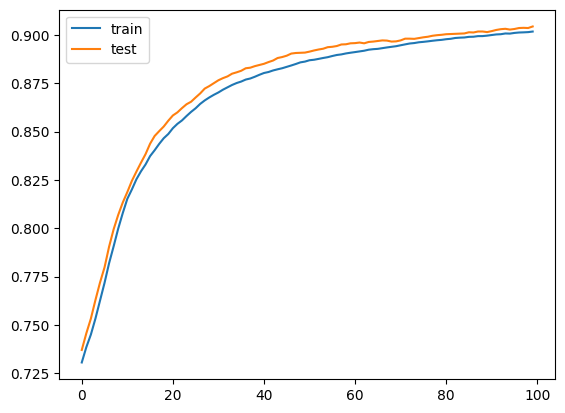

In [13]:
for epoch in range(n_epochs):
  total_loss = 0.
  for data in trainloader:
    model.zero_grad()
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = model(inputs)
    loss = nn.CrossEntropyLoss()(preds, labels)
    loss.backward()
    optimizer.step()

    total_loss += loss.item()

  train_acc = accuracy(model, trainloader)
  test_acc = accuracy(model, testloader)

  train_accs.append(train_acc)
  test_accs.append(test_acc)

  print(f"Epoch {epoch:3d} | Loss: {total_loss}")

plot_acc(train_accs, test_accs)